<a href="https://colab.research.google.com/github/Tpavan2004/fml/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from plotly.offline import iplot

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
s=pd.read_csv("comp.csv")


In [3]:
s.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
s.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


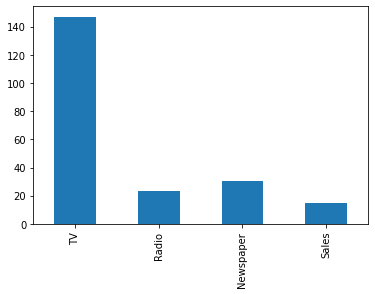

In [6]:
s.describe().loc['mean'].plot.bar()
plt.show()

In [7]:
s.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
s.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [9]:
s.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [10]:
s.shape

(200, 4)

<ipython-input-11-47bf47e88909>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='TV', ylabel='Density'>

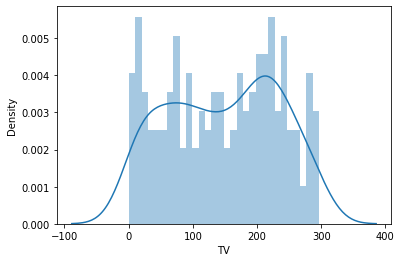

In [11]:
sns.distplot(s['TV'], bins=30)

<ipython-input-12-96c3d1bb3318>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='TV', ylabel='Density'>

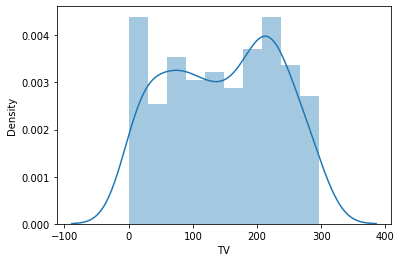

In [12]:
sns.distplot(s['TV'], bins=10)

In [13]:
sc=s.corr()
sc

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [14]:
sc.shape

(4, 4)

<Axes: >

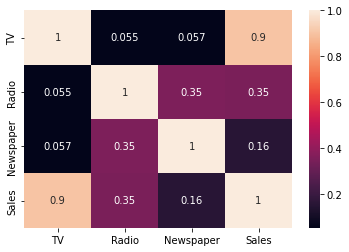

In [15]:
sns.heatmap(sc, annot=True)

In [16]:
s.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

<Axes: >

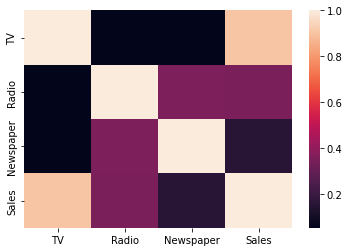

In [17]:
sns.heatmap(sc, annot=False)

In [25]:
#Create feature and target array from such given data
X = s.drop('Sales', axis=1).values
y = s['Sales'].values

In [41]:
X_rooms = X[:, 0]


In [42]:
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [43]:
X_rooms.shape, y.shape

((200,), (200, 1))

In [44]:
X_rooms = X_rooms.reshape(-1,1)
y = y.reshape(-1, 1)


In [45]:
X_rooms.shape, y.shape


((200, 1), (200, 1))

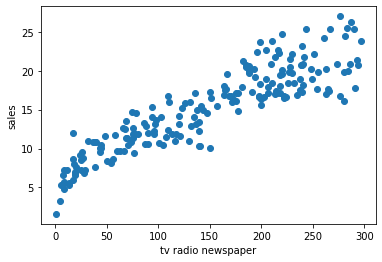

In [46]:
#plotting house value vs. no.of rooms
plt.scatter(X_rooms, y)
plt.xlabel('tv radio newspaper')
plt.ylabel('sales')
plt.show()

In [47]:
#Fitting a regression model
reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)

LinearRegression()

In [48]:
#Evaluating the model on training data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_rooms)

print(f'MAE = {mean_absolute_error(y, y_pred)}')
print(f'MSE = {mean_squared_error(y, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'R_2 = {r2_score(y, y_pred)}')

MAE = 1.8305872641932412
MSE = 5.2177438977951285
RMSE = 2.2842381438447106
R_2 = 0.8121757029987414


In [49]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)


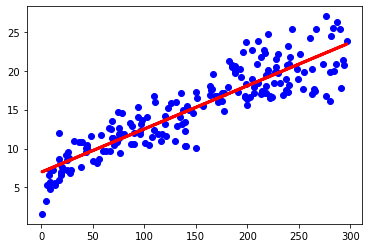

In [50]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(X_rooms, reg.predict(X_rooms), color='red', linewidth=3)
plt.show()

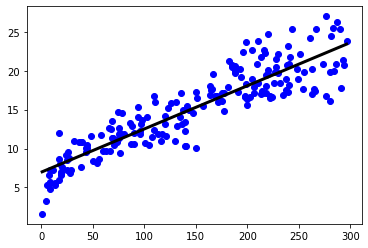

In [51]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split

X = [10,20,30,40,50,60,70,80,90,100]
y = [0,0,1,1,0,0,1,1,0,1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print(f'Train-X = {X_train} \nTrain-y = {y_train}')
print(f'Test-X = {X_test} \nTest-y = {y_test}')

Train-X = [50, 10, 40, 20, 80, 90, 60] 
Train-y = [0, 0, 1, 0, 1, 0, 0]
Test-X = [30, 100, 70] 
Test-y = [1, 1, 1]
